In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split    # train, test 데이터 분할

# 확률을 통해 예측
from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn.metrics import RocCurveDisplay, roc_auc_score

independent var : 4개 선택

dependent var : 품종 (class)  문자열 -> 숫자로 변환

분류기 만들어보기

In [44]:
pd_data = pd.read_csv('Raisin_Dataset.CSV')
print(pd_data.head())
print(pd_data['Class'].unique())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea   
0  87524       442.246011       253.291155      0.819738       90546  \
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
['Kecimen' 'Besni']


In [45]:
# pandas replace
# pd_data['Class'].replace('Kecimen', 0, inplace=True)
# pd_data['Class'].replace('Besni', 1, inplace=True)
# print(pd_data)


# 다양한 방식으로 머신러닝이 가능한 형태로 수정

# Boolean filter
# pd_data['Class'] = pd_data['Class'] == 'Kecimen'

# using pandas category dtype
# pd_data['Class'] = pd_data['Class'].astype('category').cat.codes

# custom category dtype
# from pandas.api.types import CategoricalDtype

# myclass_dtype = CategoricalDtype(['Kecimen', 'Besni'], ordered=True)
# pd_data['Class'] = pd_data['Class'].astype(myclass_dtype).cat.codes
# print(pd_data)

# sklearn label encoder
from sklearn.preprocessing import LabelEncoder

pd_data = pd.read_csv('Raisin_Dataset.CSV')

enc = LabelEncoder()
# enc.fit(pd_data['Class'].unique())
# enc.transform(pd_data['Class'])
pd_data['Class'] = enc.fit_transform(pd_data['Class'])

# print(pd_data)


                Area  MajorAxisLength  MinorAxisLength  Eccentricity   
Class                                                                  
0      112194.788889       509.000652       279.623674      0.821125  \
1       63413.466667       352.859249       229.352592      0.741960   

          ConvexArea    Extent    Perimeter  
Class                                        
0      116675.824444  0.691242  1348.127036  
1       65696.355556  0.707774   983.686236  


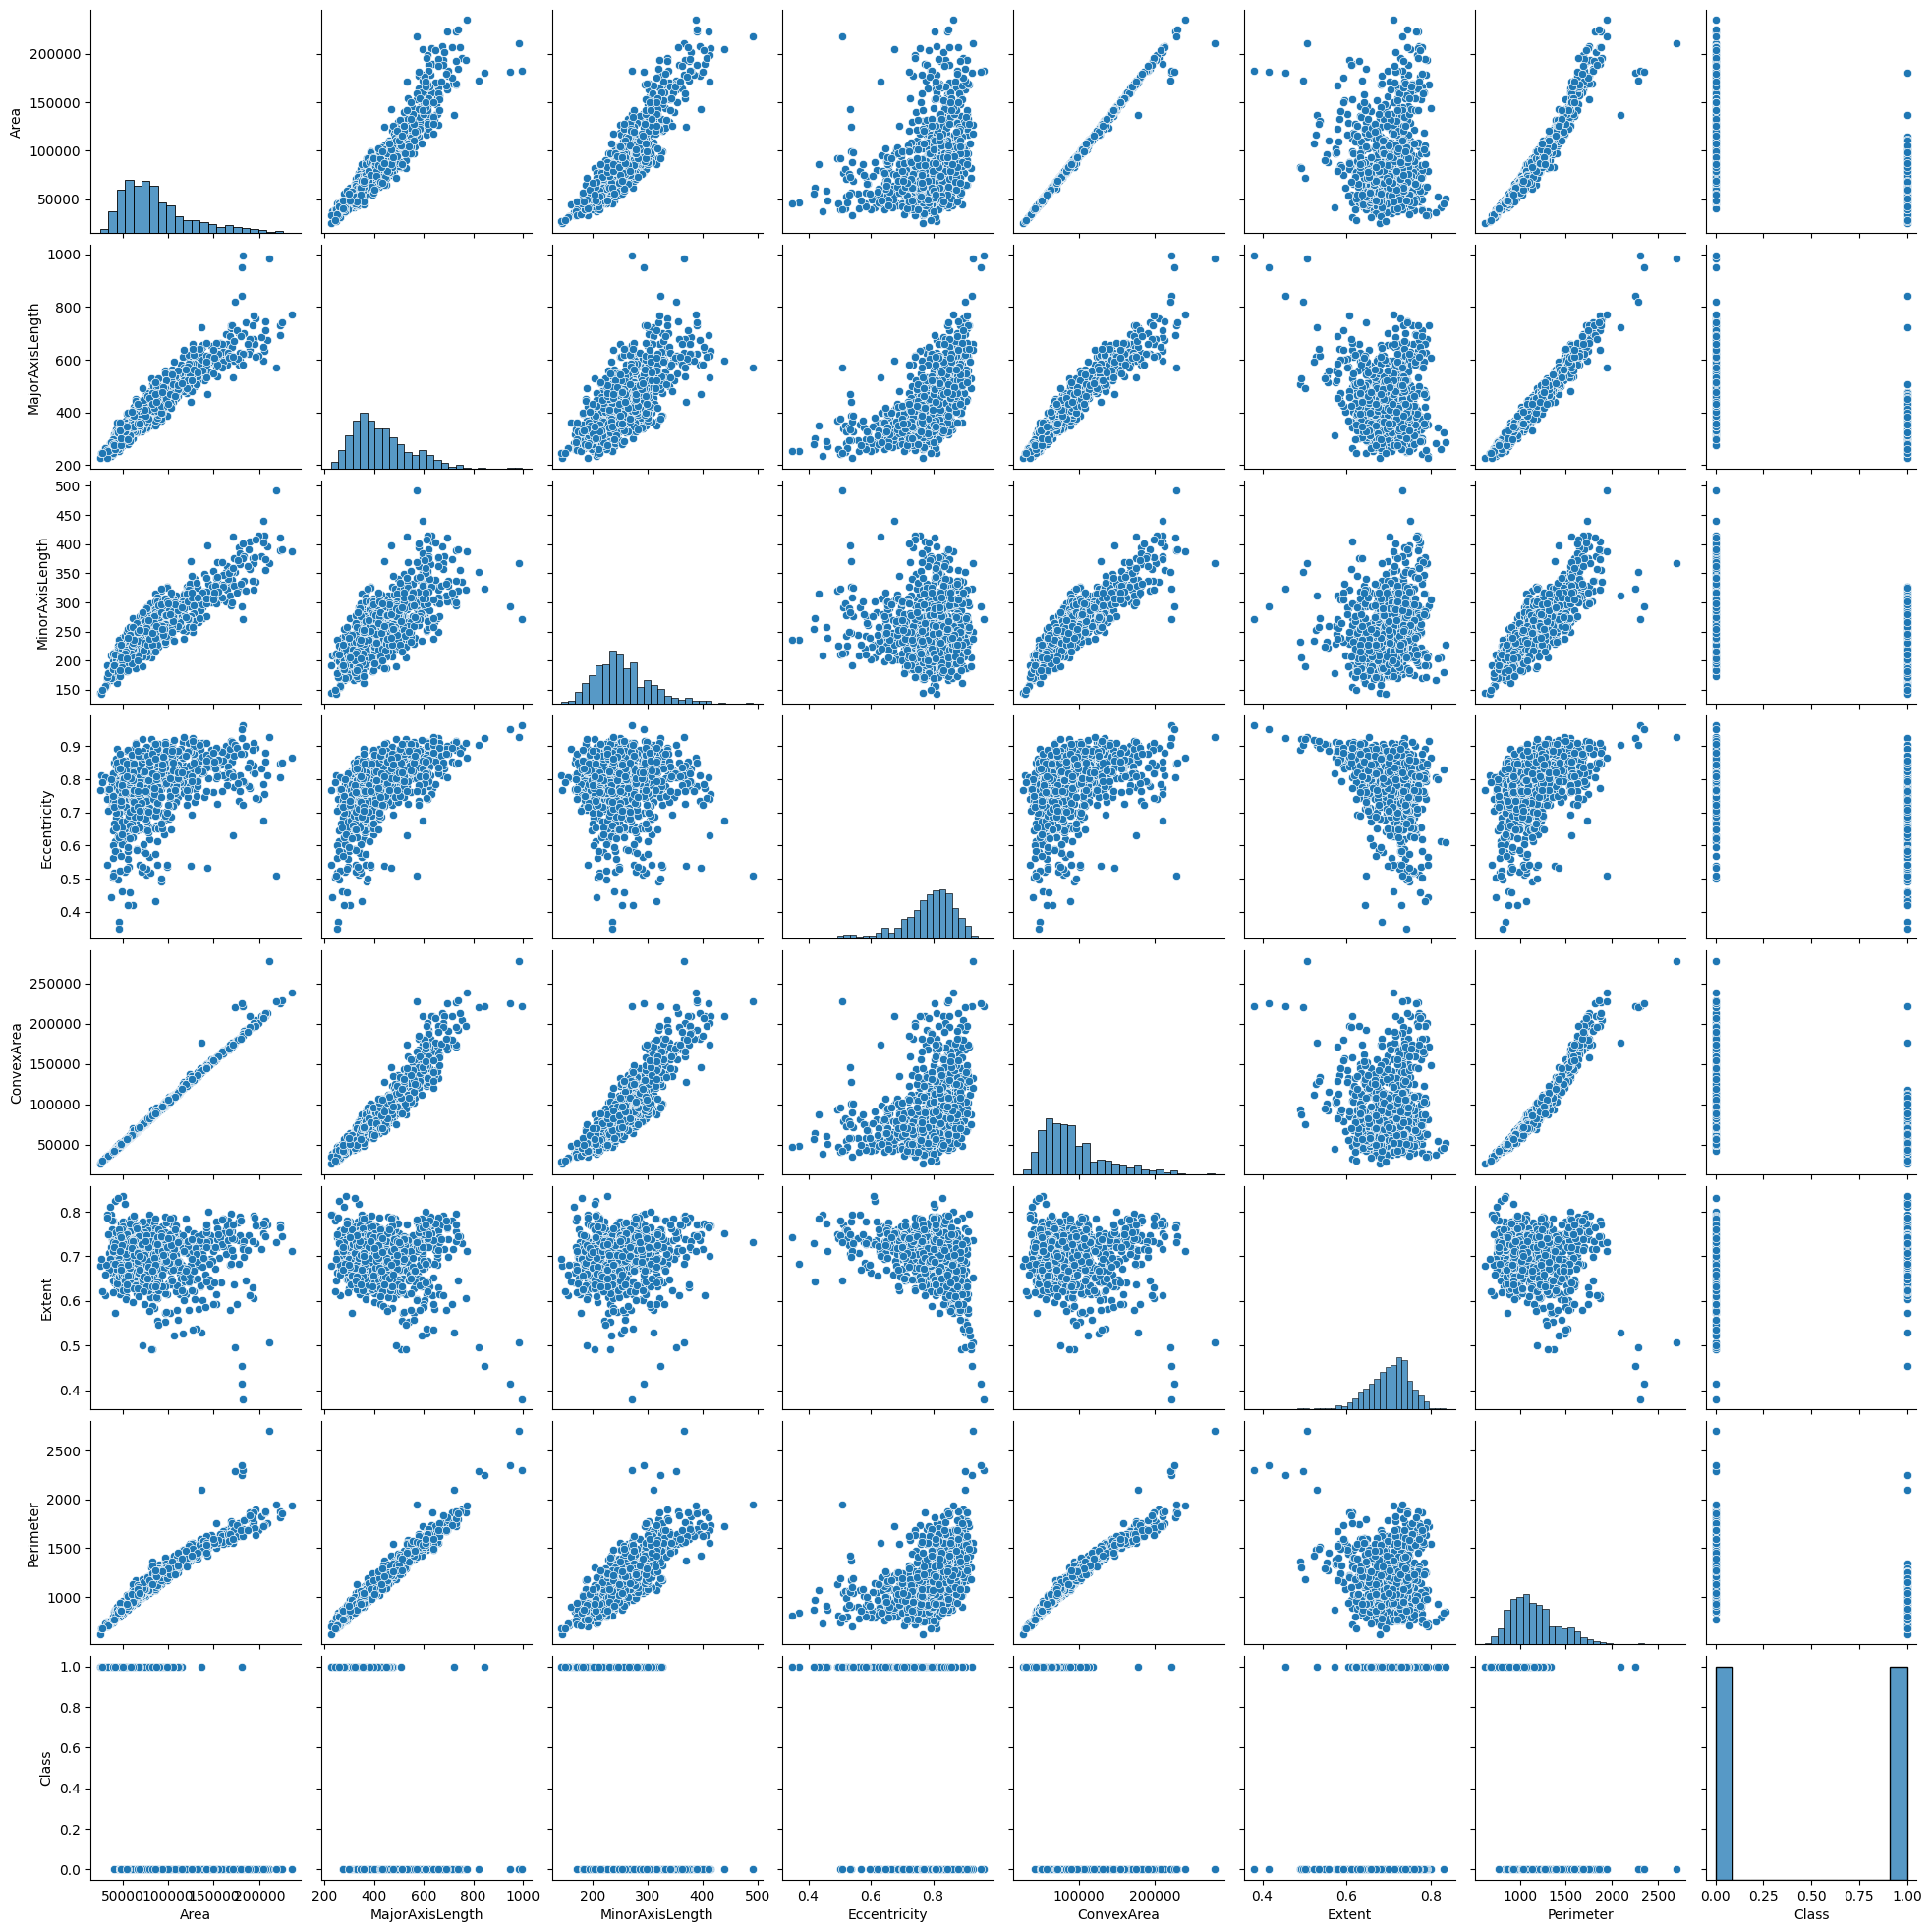

In [46]:
g1 = pd_data.groupby('Class')
print(g1.mean())

sns.pairplot(pd_data)

In [47]:
X = pd_data[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]
y = pd_data['Class']

# print(X)
# print(y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=10)

train score  0.802962962962963
test score  0.8044444444444444


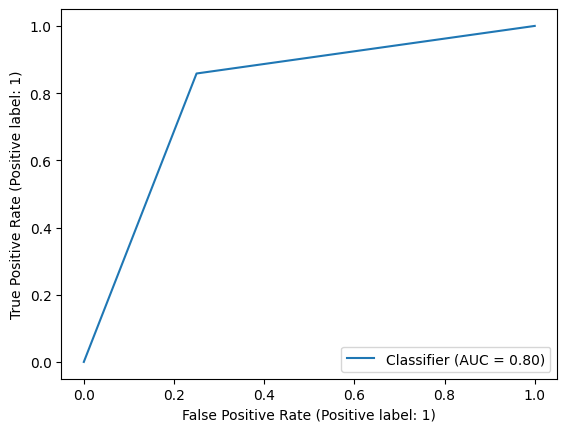

In [49]:
# print(type(X_train), X_train.shape)

m = LogisticRegression(solver='liblinear')
m.fit(X_train, y_train)

print('train score ', m.score(X_train, y_train))
print('test score ', m.score(X_test, y_test))

RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

# test score > train score으로 과적합이 아니다

train score  0.5718518518518518
test score  0.5777777777777777


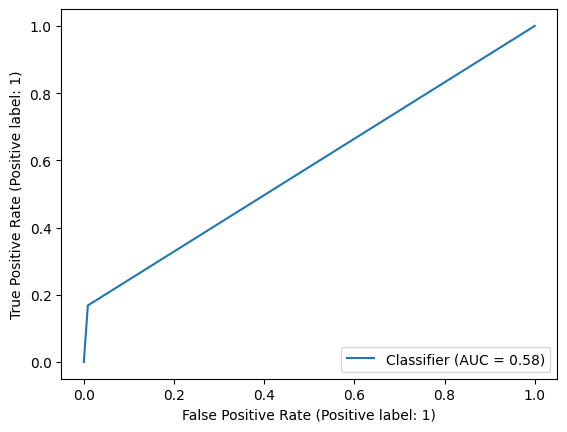

In [50]:
# m = SGDClassifier(loss='log_loss')
# m = SGDClassifier(loss='hinge')
m = SGDClassifier(loss='modified_huber')
m.fit(X_train, y_train)

print('train score ', m.score(X_train, y_train))
print('test score ', m.score(X_test, y_test))

RocCurveDisplay.from_predictions(y_test, m.predict(X_test))

StandardScaler()
[[-0.00718637  0.09757695  0.42314164  0.06627397]
 [-0.32421719 -0.20901207  0.22447639 -0.16125245]
 [ 0.07829241  0.09775835  0.18623907  0.15594468]
 ...
 [ 0.30407232  0.00670023 -0.6631136   0.46387322]
 [ 0.14671134  0.39160036  0.71117344  0.3385864 ]
 [-0.05631357  0.69976181  1.39366043  0.39090133]]


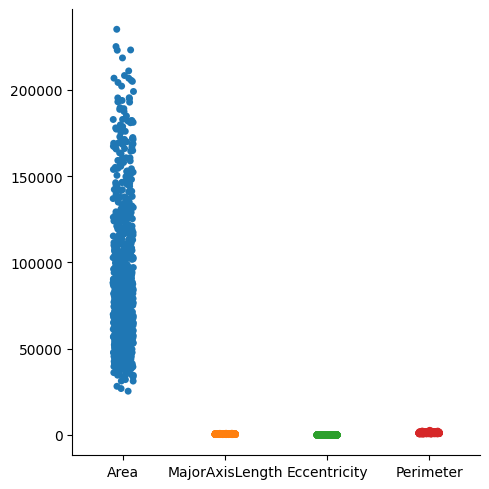

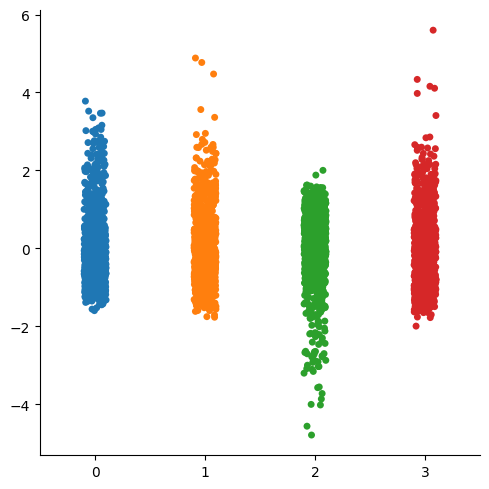

In [52]:
# print(X)

# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (X.max() - X.min()) + X.min()

# print(X_scaled)


# 스케일을 조정하여 머신러닝이 가능하도록 데이터 가공!

from sklearn.preprocessing import MinMaxScaler, StandardScaler

pd_data = pd.read_csv('Raisin_Dataset.CSV')
X = pd_data[['Area', 'MajorAxisLength', 'Eccentricity', 'Perimeter']]

sns.catplot(X)

scaler = MinMaxScaler()
scaler = StandardScaler()

print(scaler.fit(X))

X = scaler.transform(X)

print(X)

sns.catplot(X)
